In [2]:
import csv

In [3]:
close_prices = []
data = []
open_prices = []

with open('./data/prices/csvs/AAPL.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        data.append(float(row[1]))

data.reverse()
print(data)

for i in range(0,10):
    if data[i+5] > data[i+4]:
        true_trend = 'up'
    else:
        true_trend = 'down'


[189.46, 189.7, 182.91, 177.56, 178.18, 179.36, 176.3, 174.21, 175.74, 175.01, 177.97, 179.07, 175.49, 173.93, 174.79, 176.08, 171.96, 170.43, 170.69, 171.21, 173.75, 172.4, 173.66, 174.91, 177.49, 178.99, 178.39, 179.8, 180.71, 178.85, 178.72, 177.15, 175.84, 175.46, 172.88, 173.0, 173.44, 171.1, 166.89, 168.22, 170.29, 170.77, 173.97, 177.57, 176.65, 179.23, 181.82, 182.89, 182.41, 186.4, 184.8, 187.44, 188.01, 189.71, 189.69, 191.45, 190.64, 191.31, 189.97, 189.79, 190.4, 189.37, 189.95, 191.24, 189.43, 193.42, 192.32, 194.27, 195.71, 193.18, 194.71, 197.96, 198.11, 197.57, 195.89, 196.94, 194.83, 194.68, 193.6, 193.05, 193.15, 193.58, 192.53, 185.64, 184.25, 181.91, 181.18, 185.56, 185.14, 186.19, 185.59, 185.92, 183.63, 182.68, 188.63, 191.56, 193.89, 195.18, 194.5, 194.17, 192.42, 191.73, 188.04, 184.4, 186.86, 185.85, 187.68, 189.3, 189.41, 188.32, 188.85, 187.15, 185.04, 184.15, 183.86, 182.31, 181.56, 182.32, 184.37, 182.52, 181.16, 182.63, 181.42, 180.75, 179.66, 175.1, 170.1

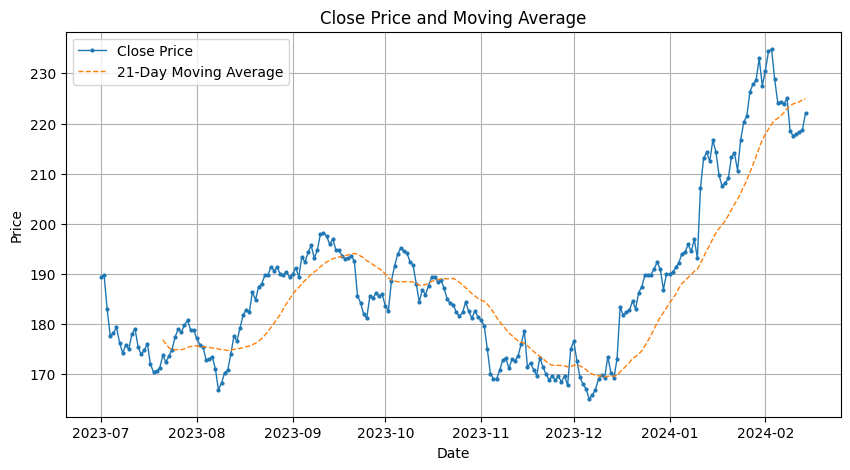

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data, columns=['Close Price'])

df['Date'] = pd.date_range(start='2023-07-01', periods=len(data), freq='D')

df['Moving Average'] = df['Close Price'].rolling(window=21).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close Price'], label='Close Price', marker='.', markersize=4, linewidth=1)
plt.plot(df['Date'], df['Moving Average'], label='21-Day Moving Average', linestyle='--', linewidth=1)

plt.title('Close Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.grid(True)
plt.show()


In [3]:
import os
from dotenv import load_dotenv

load_dotenv()

LANGCHAIN_TRACING_V2 = os.getenv("LANGCHAIN_TRACING_V2")
LANGCHAIN_API_KEY = os.getenv("LANGCHAIN_API_KEY")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [12]:

import os
from dotenv import load_dotenv
import openai

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
load_dotenv()

completion = openai.chat.completions.create(
    model="gpt-4",
    messages=[
        {
            "role": "user",
            # "content": "",
            # "content": "2+2=",
            "content": "these are the stock prices (closing price) from past 5 days: [37.07, 36.98, 37.69, 38.33, 38.45], last element of the list is the latest closing price. these are the news headlines relating to the stock's company: ['may have reached its all time high', 'is the stock price going to fall?']. predict if the stock price next day will go up or down. your answer should either be up or down, do not elaborate.",
        },
    ],
)
print(completion.choices[0].message.content)

# Initial evaluation without context

4


In [16]:
data = []
with open('./data/prices/csvs/AAPL.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        data.append(float(row[1]))
        

data.reverse()

sequences = [data[i:i+5] for i in range(10)]
actual_trends = ['up' if data[i+5] > data[i+4] else 'down' for i in range(len(data) - 5)]

def get_model_prediction(prices):
    
    completion = openai.chat.completions.create(
        model="gpt-4",
        messages=[
            {
                "role": "user",
                "content": f"Predict the stock trend based on these prices: {prices}. Your answer should either be 'up' or 'down', do not elaborate.",
            },
        ],
    )

    return completion.choices[0].message.content

accurate_values = 0
for prices, true_trend in zip(sequences[:10], actual_trends[:10]):
    predicted_trend = get_model_prediction(prices)
    if predicted_trend.lower() == true_trend:
        accurate_values += 1

print(f"Accuracy: {accurate_values/10:.2%}")



up
up
up
up
down
up
up
up
up
up
Accuracy: 60.00%


In [21]:
def get_model_prediction(prices):
    
    completion = openai.chat.completions.create(
        model="gpt-4",
        messages=[
            {
                "role": "user",
                "content": f"Predict the stock trend based on these prices: {prices}. Your answer should either be 'up' or 'down', do not elaborate.",
            },
        ],
    )

    return completion.choices[0].message.content

directory_path = './data/prices/csvs/'
files = os.listdir(directory_path)

for file in files:
    if file.endswith('.csv'):
        data = []
        with open(os.path.join(directory_path, file), newline='') as csvfile:
            print(file)
            reader = csv.reader(csvfile)
            next(reader)
            for row in reader:
                data.append(float(row[1]))

        data.reverse()

        sequences = [data[i:i+5] for i in range(10)]
        actual_trends = ['up' if data[i+5] > data[i+4] else 'down' for i in range(10)]

        accurate_values = 0
        for prices, true_trend in zip(sequences[:10], actual_trends[:10]): 
            predicted_trend = get_model_prediction(prices)
            if predicted_trend.lower() == true_trend:
                accurate_values += 1

        print(f"File: {file}, Accuracy: {accurate_values/10:.2%}") # Initial evaluation: without context averages around 50%

EQIX.csv
File: EQIX.csv, Accuracy: 70.00%
FCX.csv
File: FCX.csv, Accuracy: 60.00%
BAC.csv
File: BAC.csv, Accuracy: 70.00%
PEP.csv
File: PEP.csv, Accuracy: 40.00%
LLY.csv
File: LLY.csv, Accuracy: 40.00%
MRK.csv
File: MRK.csv, Accuracy: 40.00%
UNP.csv
File: UNP.csv, Accuracy: 40.00%
ABBV.csv
File: ABBV.csv, Accuracy: 20.00%
ECL.csv
File: ECL.csv, Accuracy: 50.00%
AMT.csv
File: AMT.csv, Accuracy: 70.00%
PG.csv


KeyboardInterrupt: 